<a href="https://colab.research.google.com/github/kavyajeetbora/modern_geospatial_stack/blob/master/notebooks/QGIS_COLAB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Setup QGIS in Google Colab

In [1]:
!pip freeze

absl-py==1.4.0
aiohttp==3.9.5
aiosignal==1.3.1
alabaster==0.7.16
albumentations==1.3.1
altair==4.2.2
annotated-types==0.6.0
anyio==3.7.1
appdirs==1.4.4
argon2-cffi==23.1.0
argon2-cffi-bindings==21.2.0
array_record==0.5.1
arviz==0.15.1
astropy==5.3.4
astunparse==1.6.3
async-timeout==4.0.3
atpublic==4.1.0
attrs==23.2.0
audioread==3.0.1
autograd==1.6.2
Babel==2.15.0
backcall==0.2.0
beautifulsoup4==4.12.3
bidict==0.23.1
bigframes==1.5.0
bleach==6.1.0
blinker==1.4
blis==0.7.11
blosc2==2.0.0
bokeh==3.3.4
bqplot==0.12.43
branca==0.7.2
build==1.2.1
CacheControl==0.14.0
cachetools==5.3.3
catalogue==2.0.10
certifi==2024.2.2
cffi==1.16.0
chardet==5.2.0
charset-normalizer==3.3.2
chex==0.1.86
click==8.1.7
click-plugins==1.1.1
cligj==0.7.2
cloudpathlib==0.16.0
cloudpickle==2.2.1
cmake==3.27.9
cmdstanpy==1.2.2
colorcet==3.1.0
colorlover==0.3.0
colour==0.1.5
community==1.0.0b1
confection==0.1.4
cons==0.4.6
contextlib2==21.6.0
contourpy==1.2.1
cryptography==42.0.7
cuda-python==12.2.1
cudf-cu12 @ https:

In [2]:
!nvidia-smi

Fri May 17 10:10:08 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   51C    P8              10W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [3]:
import torch, torchvision
print(torch.__version__);print(torchvision.__version__)

2.2.1+cu121
0.17.1+cu121


## 1. Setup

In [4]:
'''
Author: Lerry W.S
'''

import time
start = time.time()

!sudo apt-get install gnupg software-properties-common

!wget -qO - https://qgis.org/downloads/qgis-2021.gpg.key | sudo gpg --no-default-keyring --keyring gnupg-ring:/etc/apt/trusted.gpg.d/qgis-archive.gpg --import
!sudo chmod a+r /etc/apt/trusted.gpg.d/qgis-archive.gpg


!add-apt-repository "deb https://qgis.org/debian $(lsb_release -c -s) main"


!sudo apt update
!sudo apt install qgis qgis-plugin-grass
!sudo apt install opencl-headers ocl-icd-opencl-dev
!python -m pip install rasterio geopandas

end = time.time()
print(f"\nTotal setup time {end - start:.2f} s")

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
gnupg is already the newest version (2.2.27-3ubuntu2.1).
gnupg set to manually installed.
software-properties-common is already the newest version (0.99.22.9).
0 upgraded, 0 newly installed, 0 to remove and 45 not upgraded.
gpg: keyring '/etc/apt/trusted.gpg.d/qgis-archive.gpg' created
gpg: key 46B5721DBBD2996A: 1 signature not checked due to a missing key
gpg: directory '/root/.gnupg' created
gpg: /root/.gnupg/trustdb.gpg: trustdb created
gpg: key 46B5721DBBD2996A: public key "QGIS Archive Automatic Signing Key (2021) <qgis-developer@lists.osgeo.org>" imported
gpg: Total number processed: 1
gpg:               imported: 1
gpg: no ultimately trusted keys found
Repository: 'deb https://qgis.org/debian jammy main'
Description:
Archive for codename: jammy components: main
More info: https://qgis.org/debian
Adding repository.
Press [ENTER] to continue or Ctrl-c to cancel.
Adding deb entry to /et

In [5]:
!which qgis

/usr/bin/qgis


In [6]:
!ls /usr/share/qgis/python/plugins/
!ls /usr/share/qgis/python

db_manager  grassprovider  MetaSearch  otbprovider  processing	sagaprovider
console  plugins  pyplugin_installer  qsci_apis


In [7]:
# environment setup
%env PYTHONPATH='/usr/share/qgis/python'
%env LD_LIBRARY_PATH='/usr/lib/qgis'
%env QGIS_PREFIX='/usr'

import sys
import os

sys.path.append('/usr/share/qgis/python/plugins/')
sys.path.append('/usr/share/qgis/python/')

import qgis
from qgis.gui import *
from qgis.core import *
from qgis.utils import plugins
from PyQt5.QtCore import *
from qgis.analysis import QgsNativeAlgorithms

env: PYTHONPATH='/usr/share/qgis/python'
env: LD_LIBRARY_PATH='/usr/lib/qgis'
env: QGIS_PREFIX='/usr'


<frozen importlib._bootstrap>:914: ImportWarning: _PyDrive2ImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _PyDriveImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _GenerativeAIImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _OpenCVImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: APICoreClientInfoImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _BokehImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _AltairImportHook.find_spec() not found; falling back to find_module()


You might want to test other QGIS version as well.. just change the link within this line:
```bash
!add-apt-repository "deb https://qgis.org/ubuntu `lsb_release -c -s` main"
```
to these:

Latest Release
- https://qgis.org/debian
- https://qgis.org/ubuntu
- https://qgis.org/ubuntugis
- https://qgis.org/debian-nightly-release
- https://qgis.org/ubuntu-nightly-release
- https://qgis.org/ubuntugis-nightly-release

Long Term Release Repository
- https://qgis.org/debian-ltr
- https://qgis.org/ubuntu-ltr
- https://qgis.org/ubuntugis-ltr
- https://qgis.org/debian-nightly-ltr
- https://qgis.org/ubuntu-nightly-ltr
- https://qgis.org/ubuntugis-nightly-ltr

In [8]:
## Uncomment to check processing folder

# !ls -lh /usr/share/qgis/python/plugins/processing

## 2. Testing

In [ ]:
# imports the drive library and mounts your Google Drive as a VM local drive
from google.colab import drive
drive.mount('/content/gdrive',force_remount=True)

In [10]:
# Jump to the next cell if you already have your own data from GDrive
# Use this cell to download our sample data for this tutorial
# !mkdir /content/data/
# !mkdir /content/data/geojson
# !mkdir /content/data/dem
!wget https://raw.githubusercontent.com/LonnyGomes/CountryGeoJSONCollection/master/geojson/IND.geojson -O IND.geojson

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


--2024-05-17 10:24:59--  https://raw.githubusercontent.com/LonnyGomes/CountryGeoJSONCollection/master/geojson/IND.geojson
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 313210 (306K) [text/plain]
Saving to: ‘IND.geojson’

IND.geojson         100%[===================>] 305.87K  --.-KB/s    in 0.006s  

2024-05-17 10:25:00 (50.9 MB/s) - ‘IND.geojson’ saved [313210/313210]



In [ ]:
## Uncomment this if you have your data from Google Drive
## symlink dataset folder from Google Drive to local folder in Colab.

#!ln -s /content/gdrive/My\ Drive/misc_data /content/data

In [ ]:
# check your folder contents
!ls -ls /content/data/geojson

In [ ]:
# environment setup
!export PYTHONPATH="/usr/share/qgis/python"
!export LD_LIBRARY_PATH="/usr/lib/qgis"
!export QGIS_PREFIX="/usr"

In [ ]:
import sys
sys.path.append('/usr/share/qgis/python/plugins/')
sys.path.append('/usr/share/qgis/python/')

In [11]:
%matplotlib inline
import os
from osgeo import ogr
from qgis.core import *
from qgis.analysis import *

import geopandas as gpd
import matplotlib.pyplot as plt

<frozen importlib._bootstrap>:914: ImportWarning: _PyDrive2ImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _PyDriveImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _GenerativeAIImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _OpenCVImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: APICoreClientInfoImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _BokehImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _AltairImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _PyDrive2ImportHook.find_spec() not found; falling back to find_module()
<frozen impo

In [12]:
import processing
from processing.core.Processing import Processing
Processing.initialize()
QgsApplication.processingRegistry().addProvider(QgsNativeAlgorithms())

# Check available QGIS processing algorithms
for alg in QgsApplication.processingRegistry().algorithms():
        print(alg.id(), "--->", alg.displayName())

<frozen importlib._bootstrap>:914: ImportWarning: _PyDrive2ImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _PyDriveImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _GenerativeAIImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _OpenCVImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: APICoreClientInfoImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _BokehImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _AltairImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _PyDrive2ImportHook.find_spec() not found; falling back to find_module()
<frozen impo

3d:tessellate ---> Tessellate
gdal:aspect ---> Aspect
gdal:assignprojection ---> Assign projection
gdal:buffervectors ---> Buffer vectors
gdal:buildvirtualraster ---> Build virtual raster
gdal:buildvirtualvector ---> Build virtual vector
gdal:cliprasterbyextent ---> Clip raster by extent
gdal:cliprasterbymasklayer ---> Clip raster by mask layer
gdal:clipvectorbyextent ---> Clip vector by extent
gdal:clipvectorbypolygon ---> Clip vector by mask layer
gdal:colorrelief ---> Color relief
gdal:contour ---> Contour
gdal:contour_polygon ---> Contour Polygons
gdal:convertformat ---> Convert format
gdal:dissolve ---> Dissolve
gdal:executesql ---> Execute SQL
gdal:extractprojection ---> Extract projection
gdal:fillnodata ---> Fill nodata
gdal:gdal2tiles ---> gdal2tiles
gdal:gdal2xyz ---> gdal2xyz
gdal:gdalinfo ---> Raster information
gdal:gridaverage ---> Grid (Moving average)
gdal:griddatametrics ---> Grid (Data metrics)
gdal:gridinversedistance ---> Grid (Inverse distance to a power)
gdal:grid

### 2.1 Vector Processing

In [14]:
inputvector.

<QgsVectorLayer: '' (ogr)>

In [15]:
from qgis.core import QgsVectorLayer, QgsProject

# Replace 'my_geo.json' with the actual path to your GeoJSON file
vlayer = QgsVectorLayer("IND.json", "mygeojson", "ogr")

# Add the layer to the map
QgsProject.instance().addMapLayer(vlayer)

<QgsVectorLayer: 'mygeojson' (ogr)>

<frozen importlib._bootstrap>:914: ImportWarning: _PyDrive2ImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _PyDriveImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _GenerativeAIImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _OpenCVImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: APICoreClientInfoImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _BokehImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _AltairImportHook.find_spec() not found; falling back to find_module()


<Axes: >

<frozen importlib._bootstrap>:914: ImportWarning: _PyDrive2ImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _PyDriveImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _GenerativeAIImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _OpenCVImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: APICoreClientInfoImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _BokehImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _AltairImportHook.find_spec() not found; falling back to find_module()


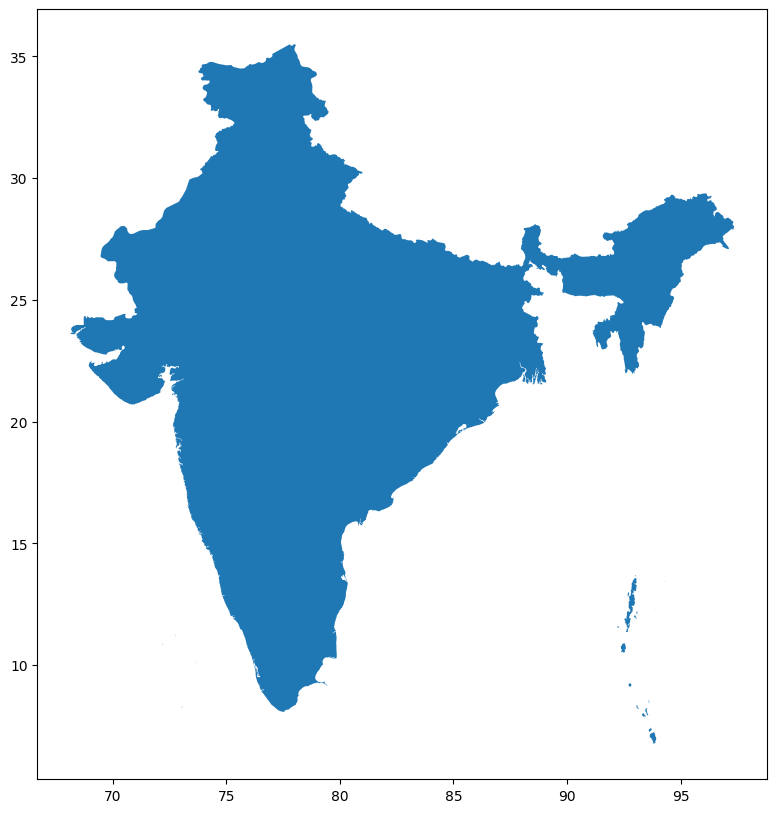

In [13]:
source = r"IND.geojson"
inputvector = QgsVectorLayer(source)
fig, ax = plt.subplots(figsize = (10,10))
gpd.read_file(source).plot(ax=ax)

In [ ]:
vertice_out = r"/content/data/geojson/out_vertices.gpkg"
# delete output if exist
if os.path.exists(vertice_out):
    os.remove(vertice_out)
else:
    pass
params = {
    'INPUT': inputvector,
    'OUTPUT': vertice_out
}
feedback = QgsProcessingFeedback()
processing.run("native:extractvertices", params, feedback=feedback)
fig, ax = plt.subplots(figsize = (10,10))
gpd.read_file(vertice_out).plot(ax=ax)

In [ ]:
processing.algorithmHelp("native:buffer")

In [ ]:
buf_out = r"/content/data/geojson/buffer_output.gpkg"
# delete output if exist
if os.path.exists(buf_out):
    os.remove(buf_out)
else:
    pass
params = {
    'INPUT': inputvector,
    'DISTANCE': 0.01,
    'OUTPUT': buf_out
}
feedback = QgsProcessingFeedback()
processing.run("native:buffer", params, feedback=feedback)
fig, ax = plt.subplots(figsize = (10,10))
gpd.read_file(buf_out).plot(ax=ax)

In [ ]:
random_points = r"/content/data/geojson/random_points.gpkg"
# delete output if exist
if os.path.exists(random_points):
    os.remove(random_points)
else:
    pass
params = {
    '-a': False,
    '-z': False,
    'GRASS_MIN_AREA_PARAMETER': 0.0001,
    'GRASS_OUTPUT_TYPE_PARAMETER': 0,
    'GRASS_REGION_PARAMETER': None,
    'GRASS_SNAP_TOLERANCE_PARAMETER': -1,
    'GRASS_VECTOR_DSCO': '',
    'GRASS_VECTOR_EXPORT_NOCAT': False,
    'GRASS_VECTOR_LCO': '',
    'column': 'z',
    'column_type': 0,
    'npoints': 10000,
    'restrict': inputvector,
    'seed': None,
    'where': '',
    'zmax': 0,
    'zmin': 0,
    'output': random_points
    }
feedback = QgsProcessingFeedback()
processing.run("grass7:v.random", params, feedback=feedback)
fig, ax = plt.subplots(figsize = (10,10))
gpd.read_file(random_points).plot(ax=ax)

### 2.2 Raster Processing

In [ ]:
import rasterio
import rasterio.plot

rast_src = r"/content/data/dem/srtm_dem.tif"
raster_layer = QgsRasterLayer(rast_src)

with rasterio.open(rast_src) as src:
    fig, ax = plt.subplots(figsize = (10,10))
    rasterio.plot.show(src, ax=ax, title='DEM')

In [ ]:
cont50 = r"/content/data/geojson/contour50m.gpkg"

if os.path.exists(cont50):
    os.remove(cont50)
else:
    pass
#gdal:contour
params = {
    'BAND': 1,
    'CREATE_3D': False,
    'EXTRA': '',
    'FIELD_NAME': 'ELEV',
    'IGNORE_NODATA': False,
    'INPUT': rast_src,
    'INTERVAL': 100,
    'NODATA': None,
    'OFFSET': 0,
    'OUTPUT': cont50
    }
feedback = QgsProcessingFeedback()
processing.run('gdal:contour', params, feedback=feedback)

with rasterio.open(rast_src) as src:
    fig, ax = plt.subplots(figsize = (10,10))
    rasterio.plot.show(src, ax=ax, title='DEM + Contour')
    gpd.read_file(cont50).plot(ax=ax)

In [ ]:
relief='/content/data/dem/relief.gpkg'
if os.path.exists(relief):
    os.remove(relief)
else:
    pass

# r.resamp.bspline
params = {
    '-c': False,
    '-n': False,
    'GRASS_OUTPUT_TYPE_PARAMETER': 0,
    'GRASS_RASTER_FORMAT_META': '',
    'GRASS_RASTER_FORMAT_OPT': '',
    'GRASS_REGION_CELLSIZE_PARAMETER': 0,
    'GRASS_REGION_PARAMETER': None,
    'GRASS_VECTOR_DSCO': '',
    'GRASS_VECTOR_EXPORT_NOCAT': False,
    'GRASS_VECTOR_LCO': '',
    'ew_step': None,
    'input': rast_src,
    'lambda': 0.5,
    'mask': None,
    'memory': 500,
    'method': 0,
    'ns_step': None,
    'grid': QgsProcessing.TEMPORARY_OUTPUT,
    'output': QgsProcessing.TEMPORARY_OUTPUT
    }
feedback = QgsProcessingFeedback()
out1 = processing.run('grass7:r.resamp.bspline', params, feedback=feedback)


# Relief
params = {
    'INPUT': out1['output'],
    'Z_FACTOR': 5,
    'AUTO_COLORS': True,
    'OUTPUT': relief
    }
feedback = QgsProcessingFeedback()
processing.run('qgis:relief', params, feedback=feedback)

with rasterio.open(relief) as src:
    fig, ax = plt.subplots(figsize = (10,10))
    rasterio.plot.show(src, ax=ax, title='Relief')